<a href="https://colab.research.google.com/github/Alam-369/Toxic-Coment/blob/main/AI_Lab_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk 
import string
import json
import re
%matplotlib inline




In [ ]:
from google.colab import files
  
  
uploaded = files.upload()


Saving AI_Part2 .csv to AI_Part2  (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AI_Part2 .csv']))


In [ ]:
data.drop(data.index[0],inplace = True)


print(data)


       Unnamed: 0                                               Data  Sentiment
1               1                 অতটুকু ভাত দিয়ে এত কিছু খেতে দিছে।         -1
2               2  আর কোন খাবারের রিভিউ দিতে পারল না দিতে গেলো কল...         -1
3               3  একদম সত্যি রিভিউ দিয়েছেন।। সত্যিই সুদীপা দি ম...         -1
4               4  কলকাতার অনেক নামকরা জায়গায় খেয়েছি কিন্তু এমন দাম?         -1
5               5  আপনি তো বাংলাদেশের একজন অভিনেতা । এত বাজে উচ্চ...         -2
...           ...                                                ...        ...
31377       31377  এইজন্যই বুঝলেন, পেইড রিভিউ করতে আমাদের খুব ভাল...          0
31378       31378  ৬ থেকে ৯ হাজার পার হেড। আমার কাছে নাম্বার নাই ...          0
31379       31379  এখানে তো দেখছি এক পক্ষ হরিলুট শুরু করে দিয়েছে ...         -2
31380       31380                         আর কত কিছু দেখবো বিড়ি বাবা         -2
31381       31381     মিডিয়ার সামনে মুখ দেখায় কিভাবে খানকির পোলায়         -2

[31381 rows x 3 columns]


In [ ]:
data.dtypes

Unnamed: 0     int64
Data          object
Sentiment      int64
dtype: object

In [ ]:
print(len(data[data.Sentiment== 2]))
print(len(data[data.Sentiment== 1]))
print(len(data[data.Sentiment== 0]))
print(len(data[data.Sentiment== -1]))
print(len(data[data.Sentiment== -2]))

6268
5958
10214
3750
5190


In [ ]:

data1['value']={}
sns.set(font_scale=1.4)
#data['Sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

NameError: ignored

# Cleaning Data

In [ ]:
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment))
    return comment
data['cleaned'] = data['Data'].apply(process_comments)  


In [ ]:
for i in range(100):
  if i>0:
    print('Original:\n',data.Data[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')

Original:
 অতটুকু ভাত দিয়ে এত কিছু খেতে দিছে। 
Cleaned:
 অতটুকু ভাত দিয়ে এত কিছু খেতে দিছে  
 Sentiment:--  -1 

Original:
 আর কোন খাবারের রিভিউ দিতে পারল না দিতে গেলো কলকাতার বাঙ্গালির খাবারের রিভিউ। আমরা বাংলাদেশীরা মনে হয় এসব রান্না খেয়ে স্বাদ পাব না।রান্না বাজে ধরনের 
Cleaned:
 আর কোন খাবারের রিভিউ দিতে পারল না দিতে গেলো কলকাতার বাঙ্গালির খাবারের রিভিউ  আমরা বাংলাদেশীরা মনে হয় এসব রান্না খেয়ে স্বাদ পাব না রান্না বাজে ধরনের 
 Sentiment:--  -1 

Original:
 একদম সত্যি রিভিউ দিয়েছেন।। সত্যিই সুদীপা দি মিষ্টি কথায় ডাকাতি শুরু করেছে 
Cleaned:
 একদম সত্যি রিভিউ দিয়েছেন   সত্যিই সুদীপা দি মিষ্টি কথায় ডাকাতি শুরু করেছে 
 Sentiment:--  -1 

Original:
 কলকাতার অনেক নামকরা জায়গায় খেয়েছি কিন্তু এমন দাম? 
Cleaned:
 কলকাতার অনেক নামকরা জায়গায় খেয়েছি কিন্তু এমন দাম  
 Sentiment:--  -1 

Original:
 আপনি তো বাংলাদেশের একজন অভিনেতা । এত বাজে উচ্চারণ কেন আপনার? "আছে "  বলতে পারেন না? "আসে" টা আবার কি? 
Cleaned:
 আপনি তো বাংলাদেশের একজন অভিনেতা   এত বাজে উচ্চারণ কেন আপনার   আছে    বলতে পারেন না   আ

#Finding the Number of words

---




In [ ]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)

In [ ]:
for i in range(100):
  if i>0:
    print('Original:\n',data.Data[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n',
           'number of words ',data.length[i],'\n')

#Data Summary:
#number of document, words, unique words and most frequent word for eatch sentiment.

In [ ]:
def data_summary(dataset):
    
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Sentiment.value_counts().to_dict().items()]


    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Sentiment==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
 
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    
        documents.append(len(list(dataset[dataset.Sentiment==label].cleaned)))
     
        words.append(len(word_list))
      

        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Sentiment==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)    

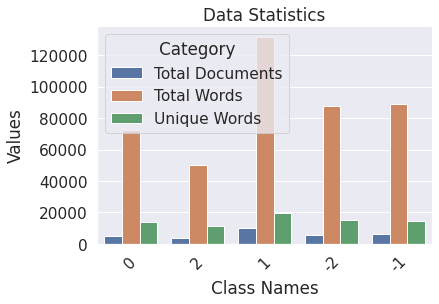

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [ ]:
#dataset['Sentiment'] = dataset['Sentiment'].apply(str)
dataset.dtypes

Unnamed: 0     int64
Data          object
Sentiment      int64
cleaned       object
length         int64
dtype: object

In [ ]:
dataset.Sentiment = dataset.Sentiment.replace({-2:-1,2:1})
positive = dataset[dataset.Sentiment == 1]
negative = dataset[dataset.Sentiment == -1][:4000]
dataset = positive.append(negative,ignore_index=True)
dataset.Sentiment.value_counts()

 1    12203
-1     4000
Name: Sentiment, dtype: int64

#Encodeing and spliting of dataset

In [ ]:
def label_encoding(sentiment,bool):
   
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


def dataset_split(feature_space,sentiment):
  
    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


#Calculating term frequency

In [ ]:
            
def calc_gram_tfidf(reviews,gram):
   
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

#Model Defination

In [ ]:
def ml_models_defination(): 
  
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
   
    model_names = ['Logistic Regression','Decision Tree','KNN']
   
    ml_models = [lr_model,dt_model,knn_model]
 
    return ml_models,model_names 

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
   
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

In [ ]:
def performance_table(performance_dict):
    
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])


    model_names = ['LR','DT','KNN']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/AI')


In [ ]:
  path = '/content/drive/My Drive/Colab Notebooks/AI/' 

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Sentiment,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
  
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
 
    #path = '/content/drive/My Drive/Colab Notebooks/AI/'   
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 28047

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 16203 
	Training		 14582 
	Test			 1621
Feature Size :======> 176680

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 16203 
	Training		 14582 
	Test			 1621
Feature Size :======> 365170

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 16203 
	Training		 14582 
	Test			 1621


In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")
  


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     79.77      80.86   96.01     87.79         LR
1     75.20      83.09   84.45     83.76         DT
2     78.53      82.79   90.47     86.46        KNN

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 79.77
Highest F1-Score achieved by LR at = 87.79
Highest Precision Score achieved by DT at = 83.09
Highest Recall Score achieved by LR at = 96.00999999999999

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score Model Name
0     78.78      79.00   98.05     87.50         LR
1     74.77      82.02   85.42     83.69         DT
2     77.54      82.24   89.74     85.83        KNN

========In case of Bigram feature:========

Highest Accuracy achieved by LR at = 78.78
Highest F1-Score achieved by LR at = 87.5
Highest Precision Score achieved by KNN at = 82.24000000000001
Highest Recall Score achieved by 

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(10,8))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);